<a href="https://colab.research.google.com/github/gitmapd/AOC/blob/main/Euribor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
#!npx degit gitmapd/AOC/inputs inputs -f
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

The mean of last three months is: 2.337


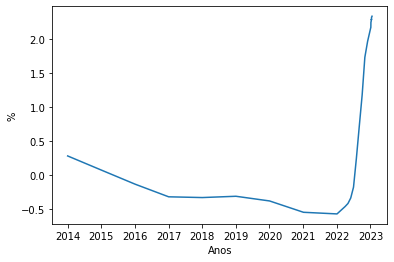

In [2]:

dic = {}
response = requests.get("https://www.euribor-rates.eu/pt/taxas-euribor-actuais/2/euribor-taxa-3-meses")
soup = BeautifulSoup(response.text,"html.parser")
a=soup.find("div",{"class":"card-body"})
for name in soup.find_all("tr"):
    cells = name.find_all("td")
    date= cells[0].text
    values = cells[1].text
    dic.update({date:values})
df = pd.DataFrame.from_dict(dic.items(), orient='columns')
df.columns = ['Date','Percentage']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
#.dt.strftime('%A %d/%m/%Y')
df['Percentage']=df['Percentage'].str.replace(",",".")
df['Percentage']=df['Percentage'].str.rstrip("%").astype(float)
print(f"The mean of last three months is: {df['Percentage'][::-1].tail(3).mean()}")
plt.xlabel("Anos")
plt.ylabel("%")
plt.plot(df["Date"], df["Percentage"])



In [4]:
from datetime import datetime,date
start = date(2022, 10, 1)
end = date(2023, 1,31)
days = pd.bdate_range(start,end)
days_range = pd.bdate_range(start, end)
#.format(formatter=lambda x: x.strftime('%Y-%m-%d'))
days_name = days.day_name()


In [6]:
#a=dict(zip(days_range,days_name))

df[df.Date > datetime.now() - pd.to_timedelta("10day")]

,Date,Percentage
0,2023-01-18,2.342
1,2023-01-17,2.335
2,2023-01-16,2.334
3,2023-01-13,2.328
4,2023-01-12,2.288
5,2023-01-11,2.298
6,2023-01-10,2.284


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')     
df['weekday'] = df['Date'].apply(lambda x: x.weekday())
df['day_of_week'] = df['Date'].dt.day_name()
df['month'] = pd.DatetimeIndex(df['Date']).month_name()
#df['day_of_month'] = pd.DatetimeIndex(df['Date']).day
#df.drop(['weekday'],axis=1,inplace=True)
df['Day of the week']=df['day_of_week']
df.drop(['weekday','day_of_week'],axis=1,inplace=True)